PART (i)

In [136]:
from datasets import load_dataset
import random
import numpy as np
import matplotlib.pyplot as plt


In [137]:
# load data and take a random set of 100 images of each class 
mnist_dataset = load_dataset("mnist")
train_data = mnist_dataset["train"]["image"]
train_labels = mnist_dataset["train"]["label"]

class_data = {str(i): [] for i in range(10)}
class_labels = {str(i): [] for i in range(10)}

for image, label in zip(train_data, train_labels):
    class_data[str(label)].append(image)
    class_labels[str(label)].append(label)

images = []
labels = []
for i in range(10):
    indices = random.sample(range(len(class_data[str(i)])), 100)
    images.extend([np.array(class_data[str(i)][j]) for j in indices])
    labels.extend([class_labels[str(i)][j] for j in indices])

In [138]:
original_images = np.array(images)
X = original_images.reshape(1000,-1)


In [139]:
N = X.shape[0] # N = 1000
d = X.shape[1] # d = 784

In [140]:
# center the data
mean = np.mean(X, axis = 0)
X = X - mean

In [141]:
X.shape

(1000, 784)

In [142]:
mean.shape

(784,)

In [143]:
# calculate covaraince matrix C
C = X.T@X/N

In [184]:
C.shape

(784, 784)

In [144]:
# obtain the eigen values and the eigen vectors
eigen_values, eigenvectors = np.linalg.eig(C)

In [145]:
def print_eig():
    # get the number of eigen vectors required to represent the dataset by atleast 95%
    sum = np.sum(eigen_values)
    for i, value in enumerate(eigen_values):
        print(f"{i + 1}th largest eigen value represents {value/sum:.2f} fraction of the dataset")
        
    plt.plot(eigen_values, marker='o', linestyle='-')
    plt.xlabel('Eigenvalue Index')
    plt.ylabel('Eigenvalue')
    plt.grid(True)
    plt.show()
    

1th largest eigen value represents 0.10+0.00j fraction of the dataset
2th largest eigen value represents 0.07+0.00j fraction of the dataset
3th largest eigen value represents 0.06+0.00j fraction of the dataset
4th largest eigen value represents 0.06+0.00j fraction of the dataset
5th largest eigen value represents 0.05+0.00j fraction of the dataset
6th largest eigen value represents 0.04+0.00j fraction of the dataset
7th largest eigen value represents 0.03+0.00j fraction of the dataset
8th largest eigen value represents 0.03+0.00j fraction of the dataset
9th largest eigen value represents 0.03+0.00j fraction of the dataset
10th largest eigen value represents 0.03+0.00j fraction of the dataset
11th largest eigen value represents 0.02+0.00j fraction of the dataset
12th largest eigen value represents 0.02+0.00j fraction of the dataset
13th largest eigen value represents 0.02+0.00j fraction of the dataset
14th largest eigen value represents 0.02+0.00j fraction of the dataset
15th largest ei

/home/ashmitha/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


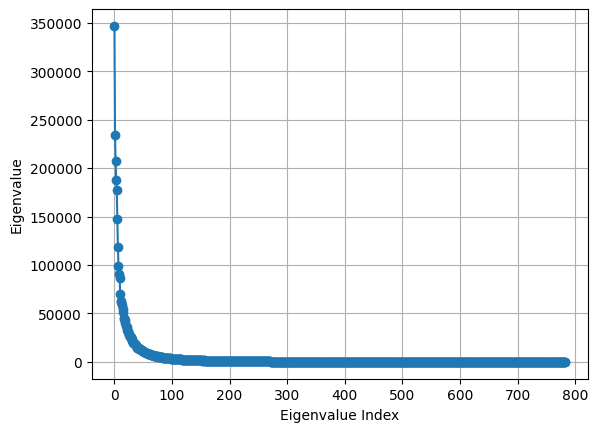

In [146]:
# variance covered by each value
print_eig()

In [147]:
def PCA(percent_cover):
    coverage = 0
    k = d
    sum = np.sum(eigen_values)

    for i, value in enumerate(eigen_values):
        coverage += (value/sum)
        if coverage >= percent_cover:
                k = i
                break
        
    

    
    reduced_space = eigenvectors[:, :k]

    principal_components = X@reduced_space

    X_reconstructed = principal_components@reduced_space.T
    X_reconstructed = X_reconstructed + mean

    reconstructed_images = []
    for i in range(N):
        reconstructed_images.append(X_reconstructed[i].reshape((28,28)))
        
    fig, axs = plt.subplots(10, 2, figsize=(28, 28))

    row = 0 
    for i in range(0, 1000, 100):
        
        ax1 = axs[row, 0]
        ax1.imshow(original_images[i].squeeze(), cmap='gray')
        ax1.axis(False)
        ax1.set_title('Original')
        
        ax2 = axs[row, 1]
        ax2.imshow(np.abs(reconstructed_images[i]).squeeze(), cmap='gray')
        ax2.axis(False)
        ax2.set_title('Reconstructed')

        row += 1

    fig.suptitle(f'Data Coverage: {percent_cover} and Dimension: {k}', fontsize=16)
    plt.tight_layout()
    plt.show()
            

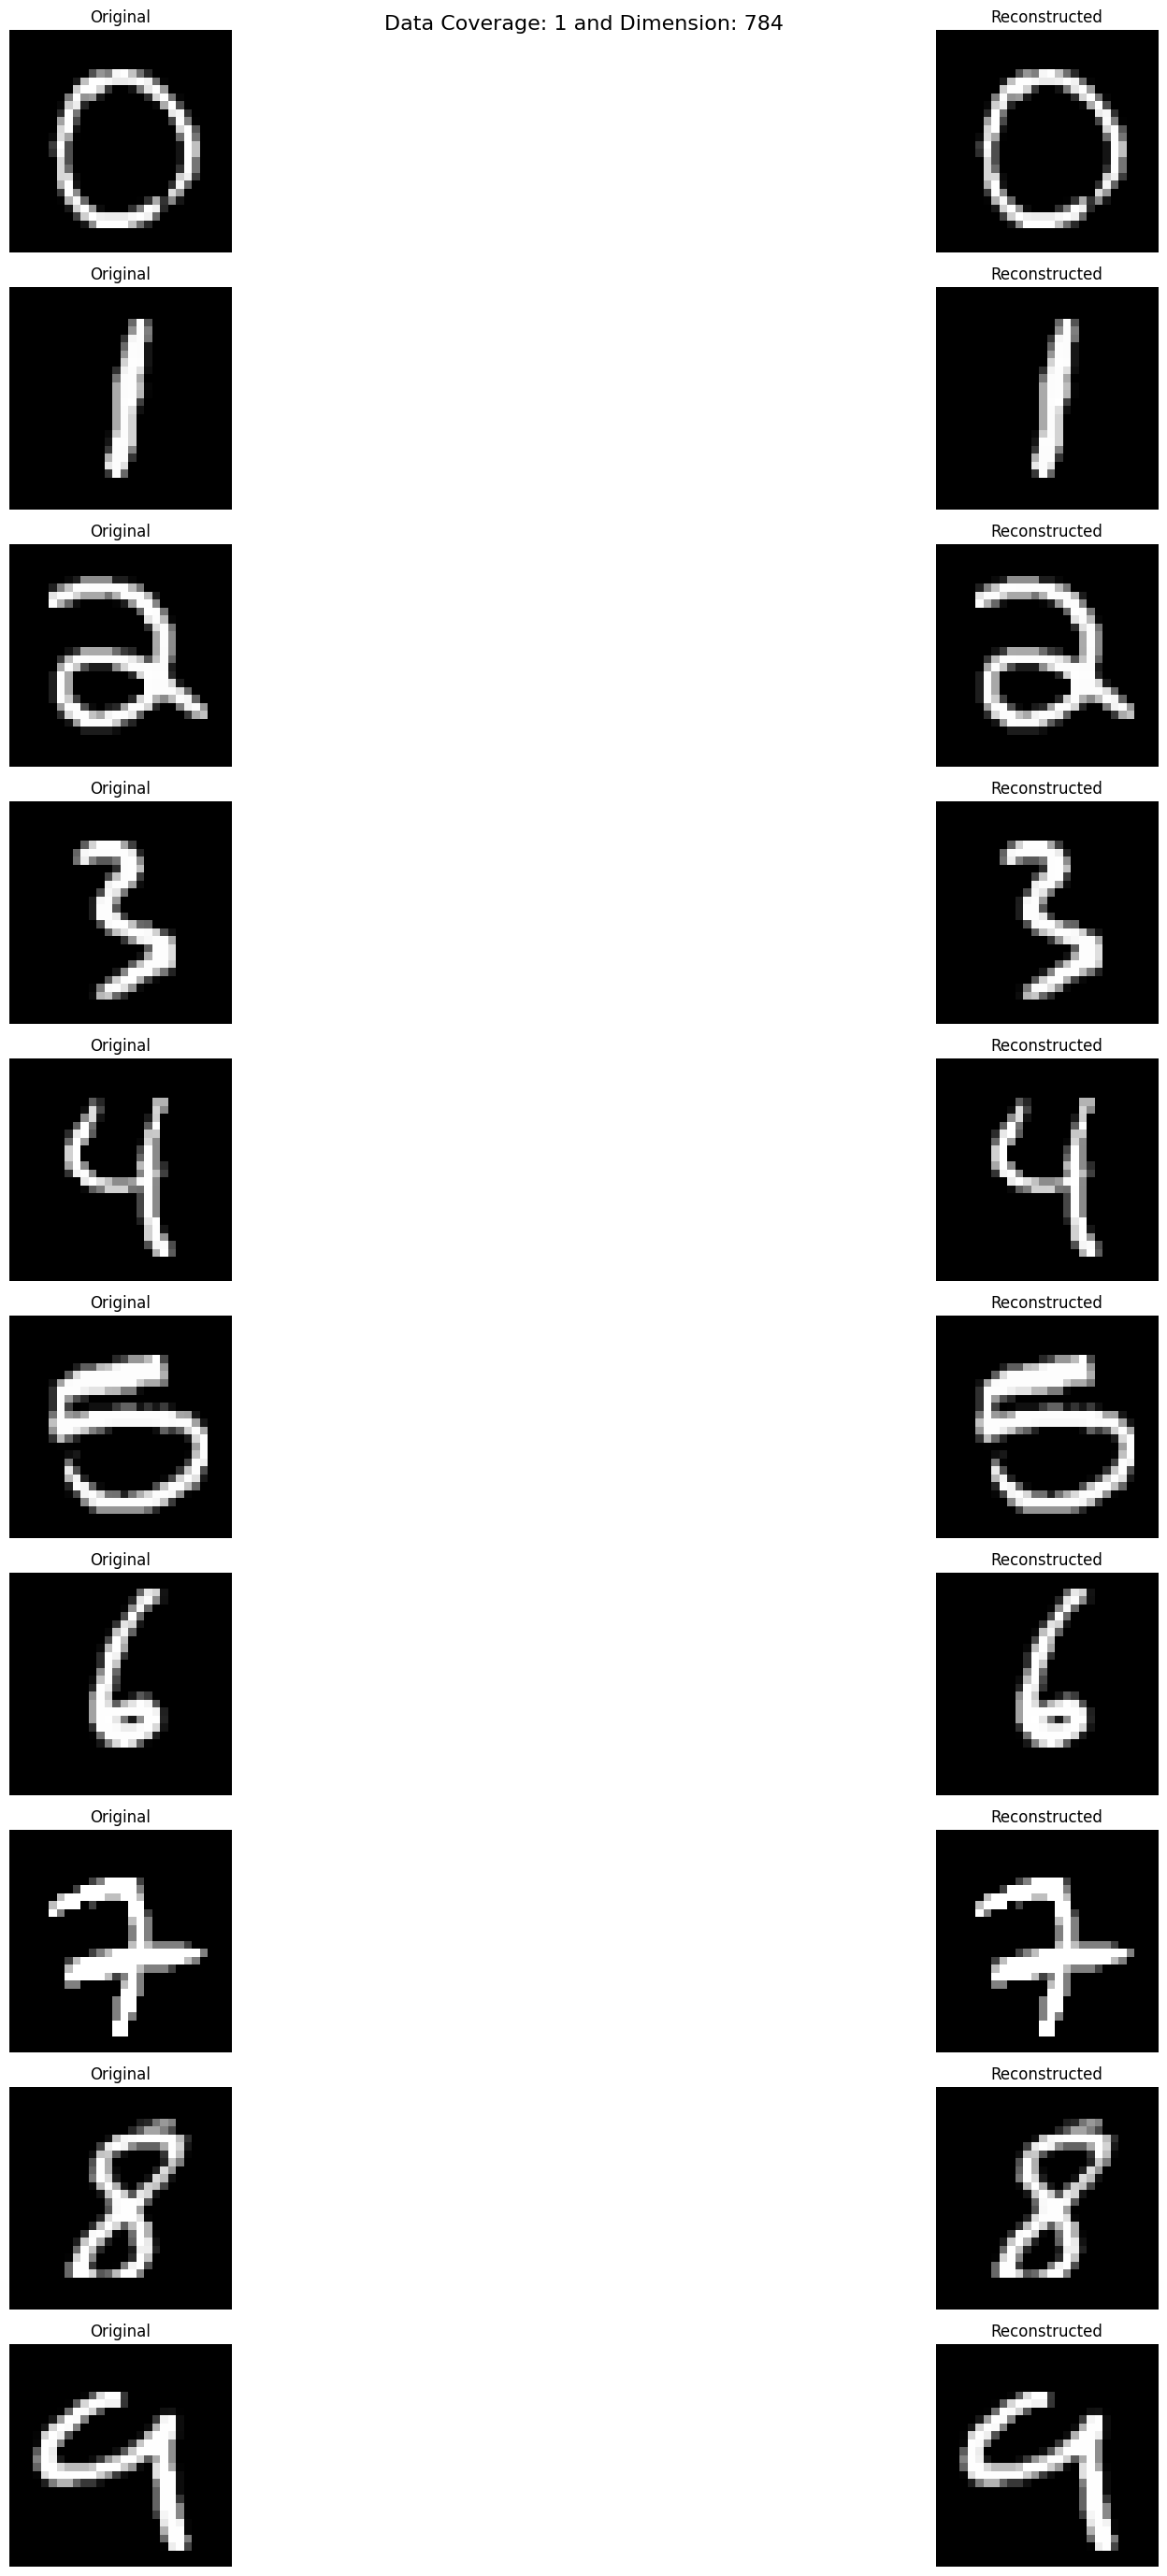

In [148]:
PCA(1)

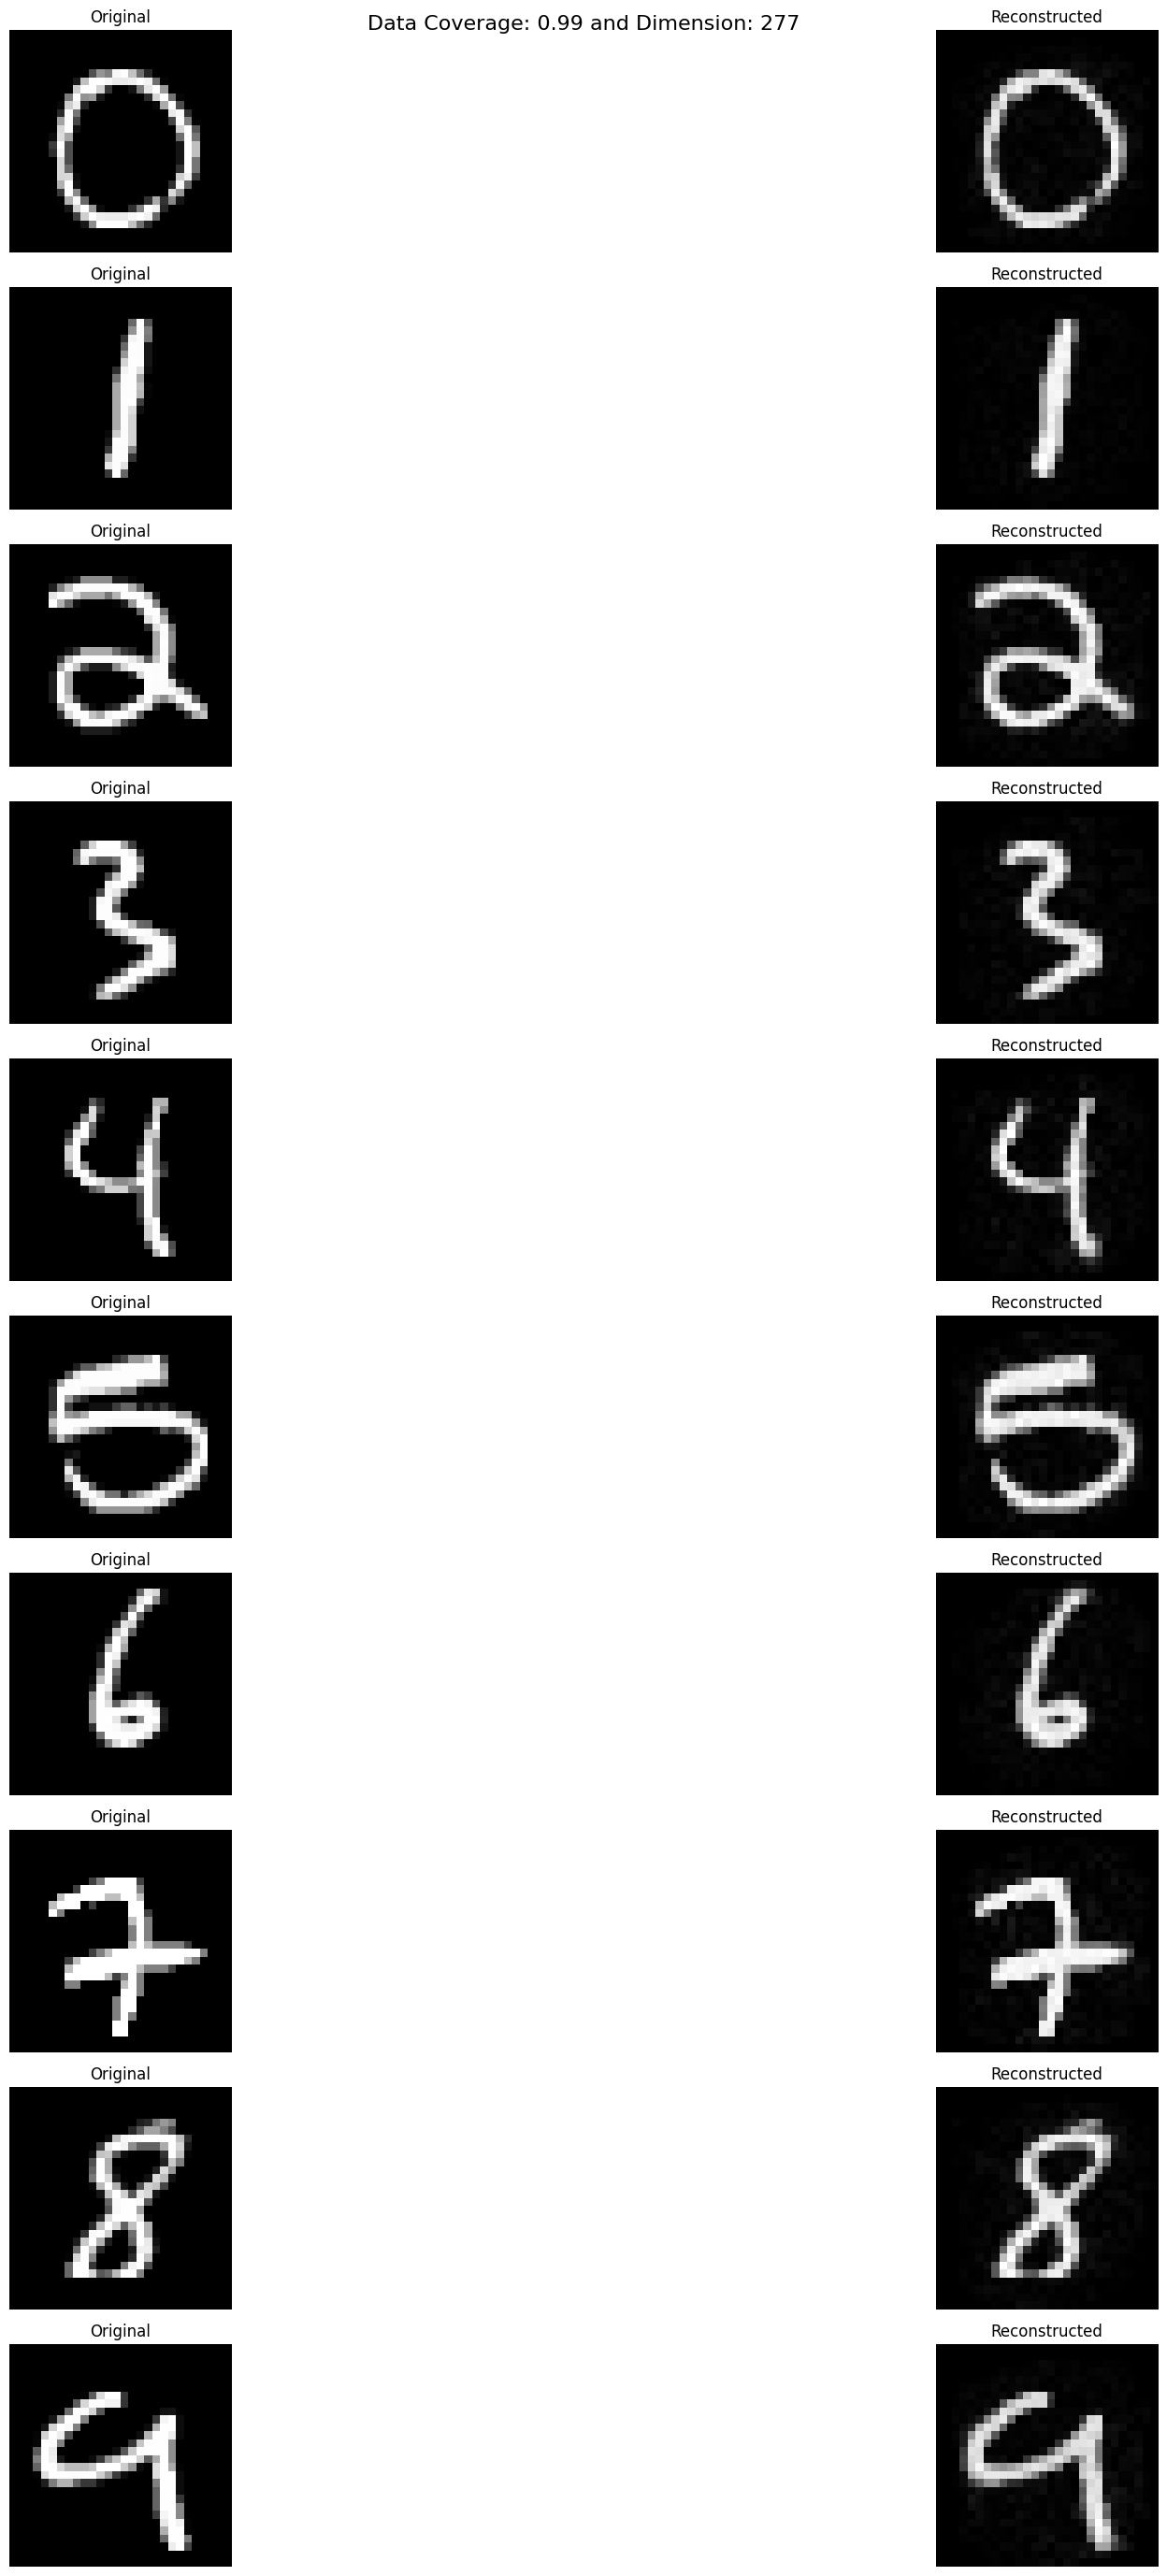

In [149]:
PCA(0.99)

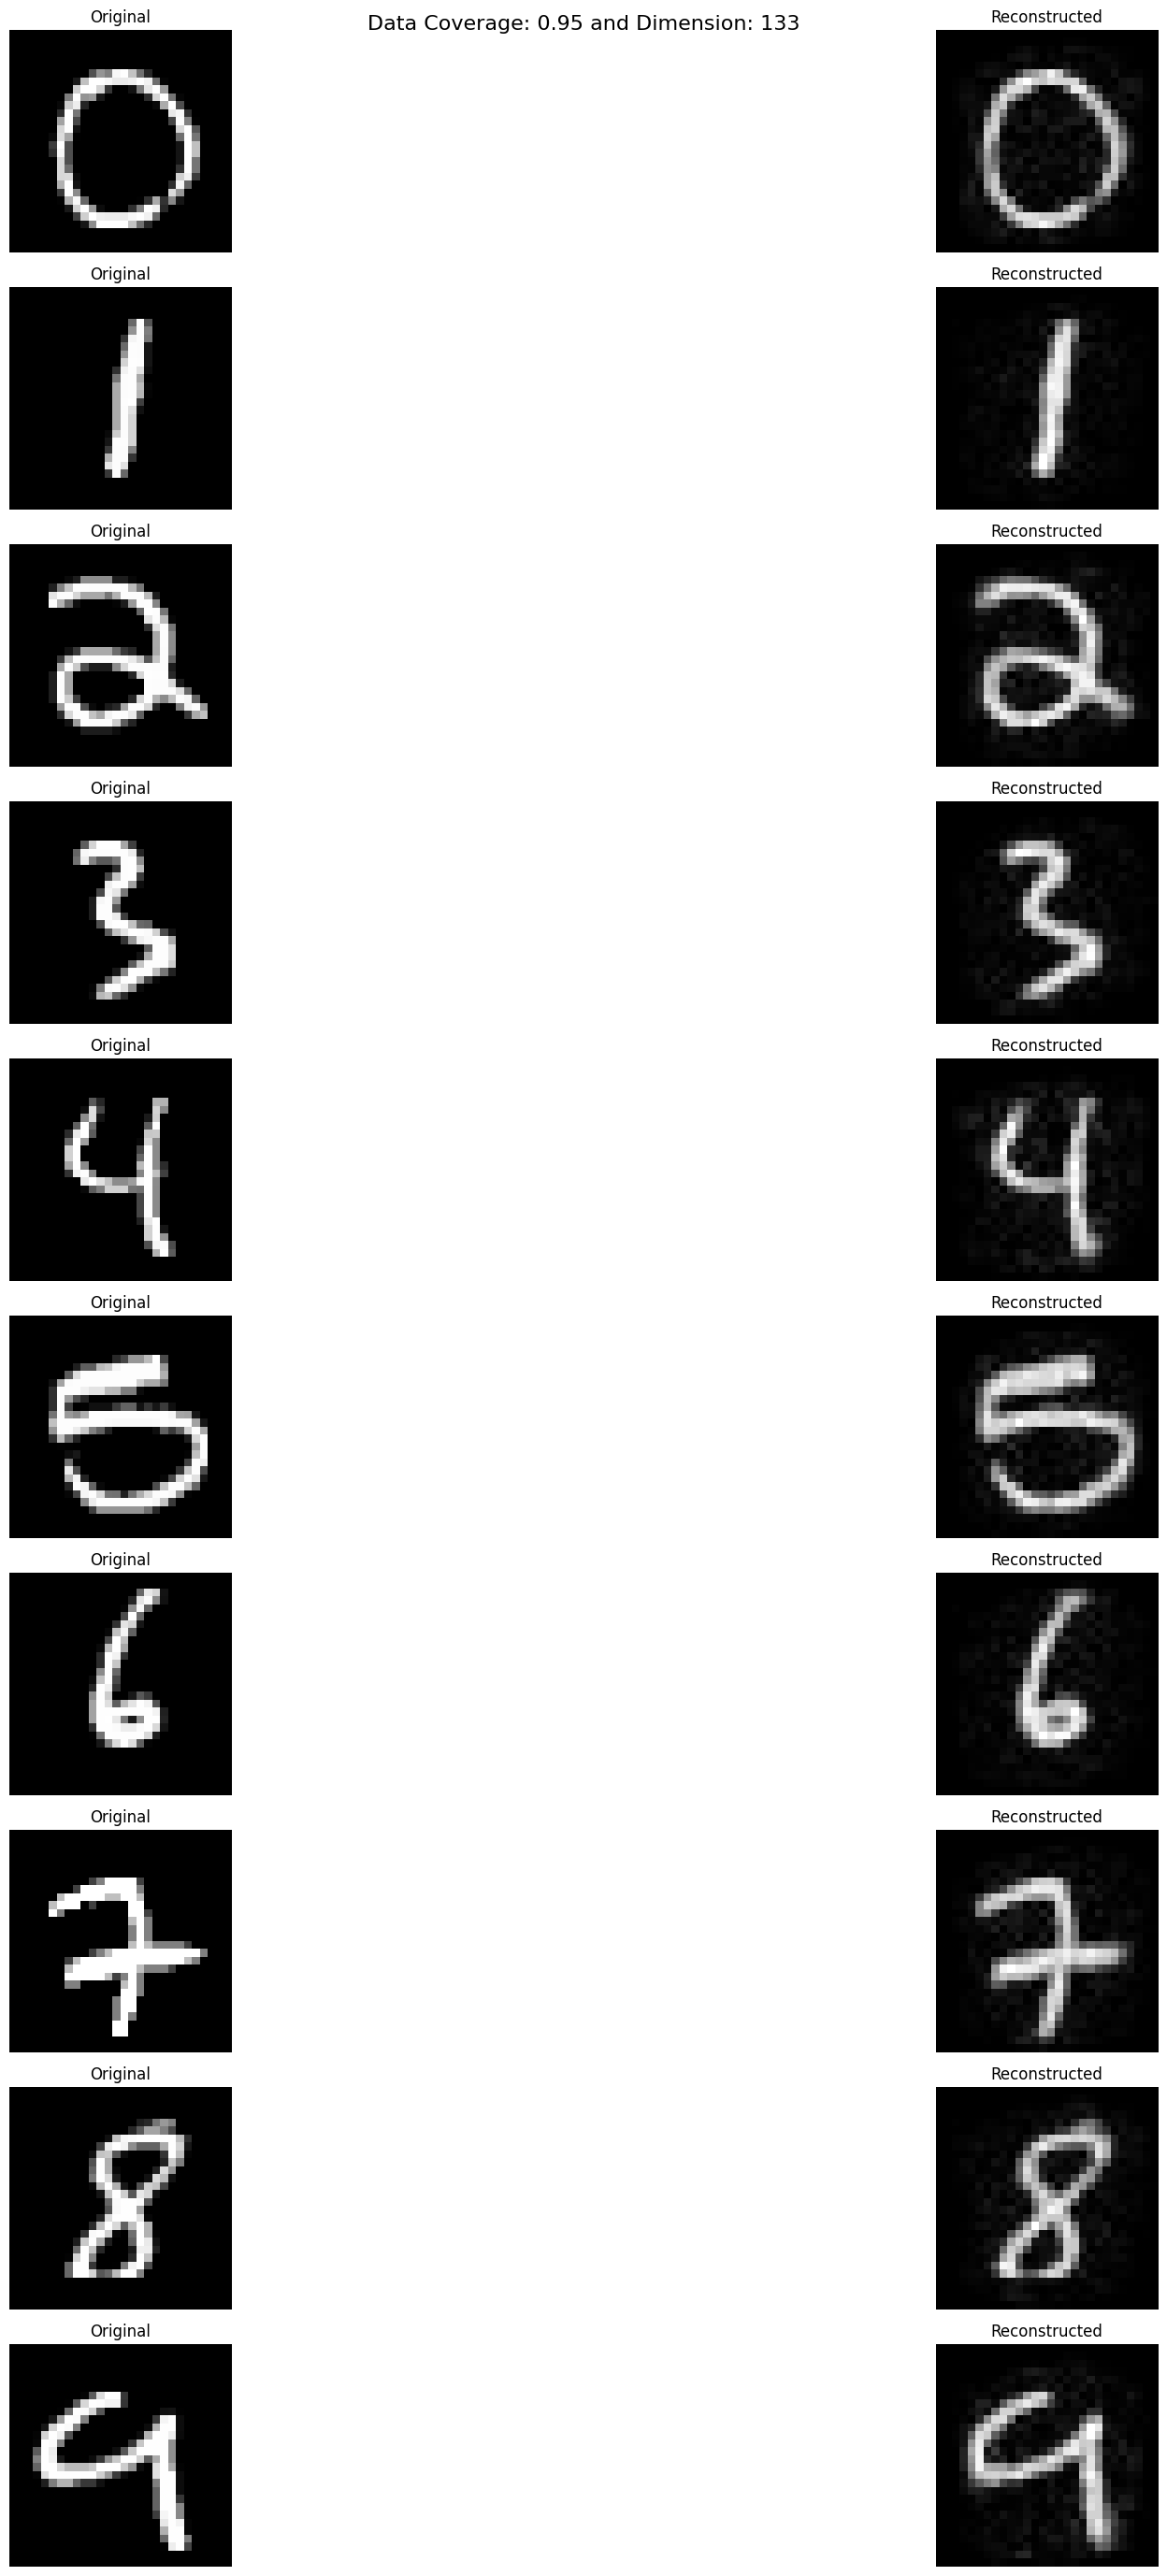

In [150]:
PCA(0.95)

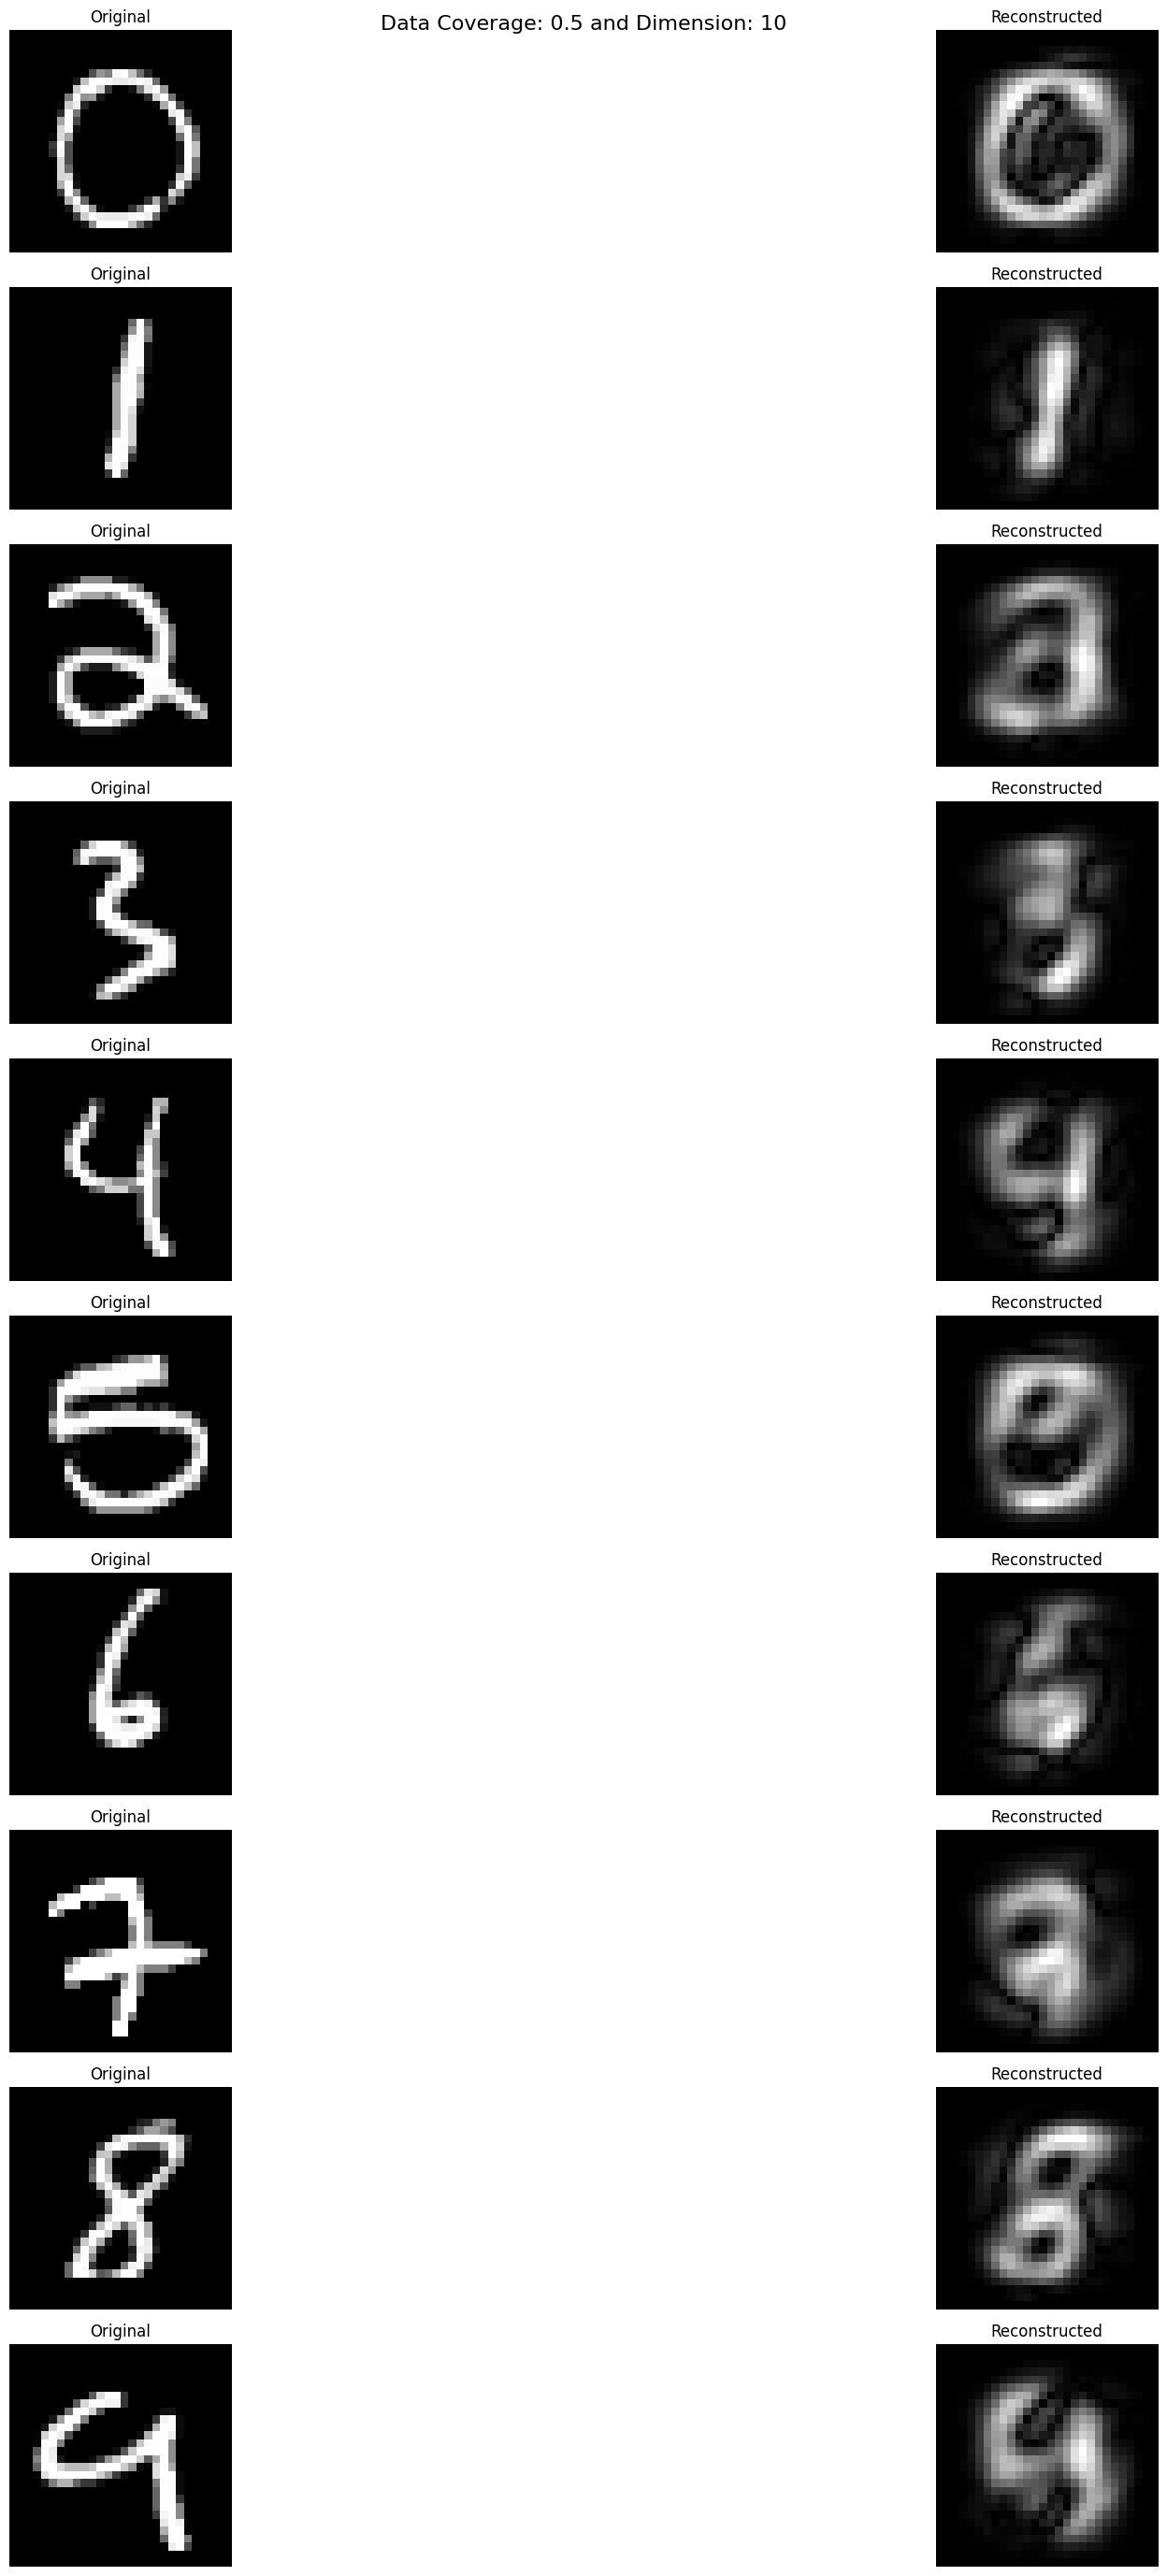

In [151]:
PCA(0.5)

KERNEL PCA (iii)

A) d=2

In [152]:
K = np.zeros((N,N))


In [190]:
d= 2

In [206]:
# def kernel_PCA_poly(d):
for i in range(N):
    for j in range(N):
        K[i][j] = (1 + X[i].T@X[j])**d

K_sum_row = np.sum(K, axis = 0)/N
K_total_sum = np.sum(K)/(N**2)

for i in range(N):
    for j in range(N):
        K[i][j] = K[i][j] - K_sum_row[i] - K_sum_row[j] + K_total_sum

eigen_values, eigenvectors = np.linalg.eig(K)
for i in range(N):
    eigenvectors[i] = eigenvectors[i]/np.sqrt(np.abs(eigen_values[i])*N)




Text(0.5, 1.0, '2D plot for 2')

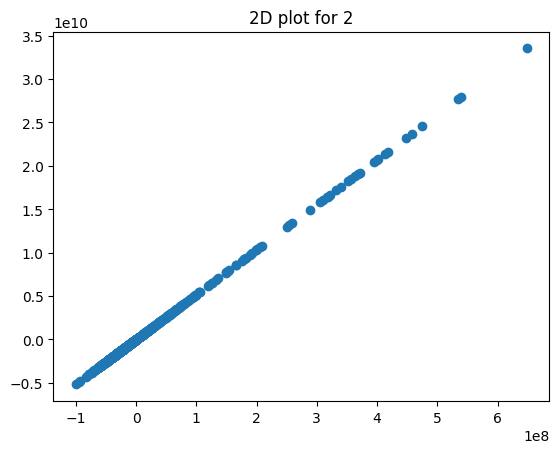

In [205]:
reduced_space = eigenvectors[:, :2]

principal_components = K@reduced_space



plt.scatter(principal_components[:,0], principal_components[:,1])
plt.title(f"2D plot for {d}")

In [203]:
principal_components.shape

(2, 1000)

In [199]:
K.shape

(1000, 1000)

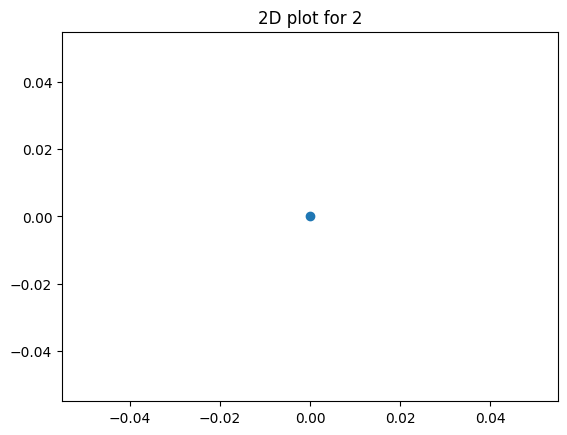

In [188]:
kernel_PCA_poly(2)

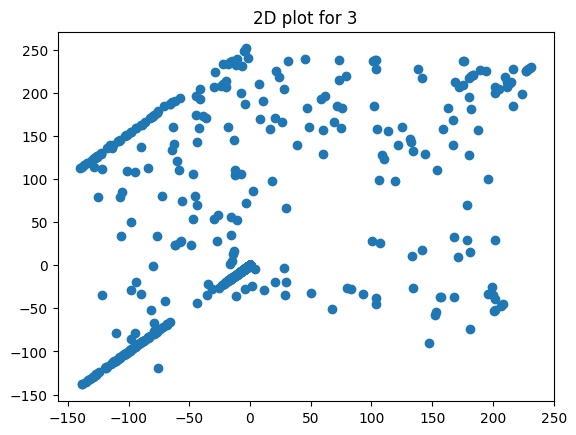

In [155]:
kernel_PCA_poly(3)

/tmp/ipykernel_50717/3931035293.py:15: RuntimeWarning: divide by zero encountered in divide
  eigenvectors[i] = eigenvectors[i]/np.sqrt(eigen_values[i]*N)


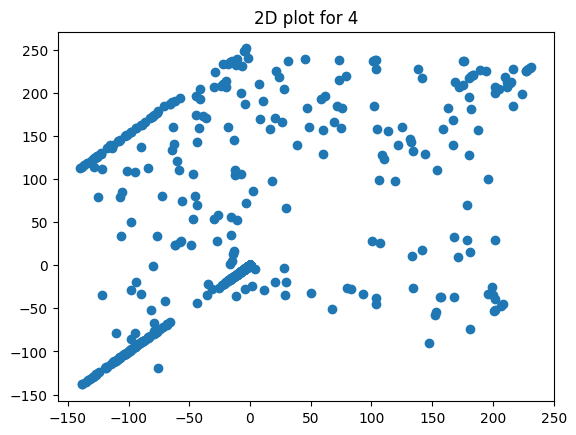

In [156]:
kernel_PCA_poly(4)

In [157]:
def kernel_PCA_radial(d):
    for i in range(N):
        for j in range(N):
            K[i][j] = np.exp(-(X[i] - X[j]).T@(X[i] - X[j]))
    
    K_sum_row = np.sum(K, axis = 0)/N
    K_total_sum = np.sum(K)/(N**2)

    for i in range(N):
        for j in range(N):
            K[i][j] = K[i][j] - K_sum_row[i] - K_sum_row[j] + K_total_sum

    eigen_values, eigenvectors = np.linalg.eig(K)
    for i in range(N):
        eigenvectors[i] = eigenvectors[i]/np.sqrt(np.real(eigen_values[i])*N)
    
    reduced_space = eigenvectors[:, :2]
    print(reduced_space.shape)
    principal_components = X.T@reduced_space
    

    plt.scatter(principal_components[0, :], principal_components[1, :])
    plt.title(f"2D plot for {d}")


(1000, 784)